<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/WeBWorK5HomeworkHelper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeBWorK 5 Homework Helper

Interpolation!

## WeBWorK 1

Write the function that describes this graph

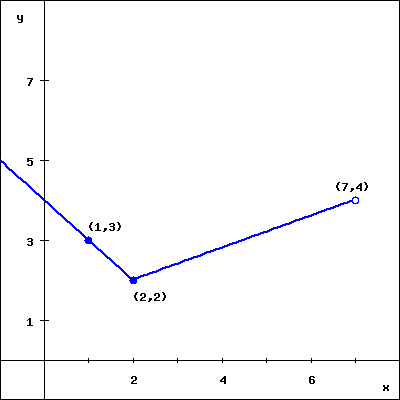

We have two lines both going through $(2,2)$.  We comput the first line to have slope of $m=-1$ and intercept $b=4$.  The second line $m=\frac{4-2}{7-2}=\frac25$ and intercept $b = 2-\frac25*2=\frac 65$

So the piecewise function is
$$
f(x) = 
\left\{
\begin{array}{ll}
-x+4& x<2\\
\frac25 x+\frac65& 2\leq x<7
\end{array}
  \right.
$$

Let's do it in python too.

In [3]:
def f(x):
  if x<2:
    return -1*x+4
  elif (x>=2) & (x<7):
    return (2*x+6)/5
  else:
    return "Undefined"


Write a function you should test it!

In [6]:
for x in range(8):
  print(f(x))

4
3
2.0
2.4
2.8
3.2
3.6
Undefined


Looks good to me, but a picture is worth a thousand words!

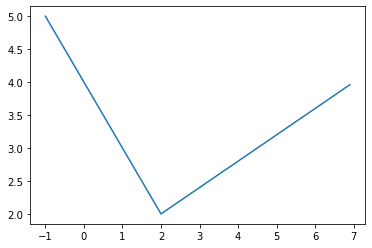

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-1,7,.1)
y = [f(n) for n in x ]

plt.plot(x,y)

I hate how many packages it requires to do that but so it goes.

## WeBWorK 5

Let p be the quartic (degree 4) polynomial that satisfies
$p(i)=2^i,i=0,1,2,3,4.$

Hint: You may have a better idea, but a brute force approach is to write
$$p(x)=ax^4+bx^3+cx^2+dx+e$$
where a, b, c, d, and e, are the unknown coefficients, and then solve the linear system p(0)=1, p(1)=2, p(2)=4, p(3)=8, and p(4)=16 for a, b, c, d, and e.

I am going the brute force route.  So if I do $p(0)=1=e$ and $p(1)=2=a+b+c+d+e$ etc.

The system will look like
$$
\left[
\begin{array}{ccccc|c}
0&0&0&0&1&1\\
1&1&1&1&1&2\\
16&8&4&2&1&4\\
81&27&9&3&1&8\\
265&64&16&4&1&16
\end{array}
  \right]
$$

In [15]:
matrix = np.array([[0,0,0,0,1],[1,1,1,1,1],[16,8,4,2,1],[81,27,9,3,1],[256,64,16,4,1]])
solnVector = np.array([1,2,4,8,16])

In [16]:
import scipy.linalg as la

la.solve(matrix,solnVector)

array([ 0.04166667, -0.08333333,  0.45833333,  0.58333333,  1.        ])

Then the solution is
$$
0.041666666x^4-0.08333333x^3+0.458333333x^2+0.58333333x+1

$$

## WeBWorK 7

Find the polynomial of degree 4 whose graph goes through the points (−2,−50), (−1,−4), (0,2), (2,14), and (3,−40).

Rather that recreate the wheel I am going to grab the functions I wrote for the project.

In [19]:
def createRow(input,output,orderOfPolynomial):
  array = []
  for i in range(orderOfPolynomial+1):
    array.append(input**i)
  array.append(output)
  return array

def createAugmentedMatrix(dataAsArray):
  matrix = []
  order = len(dataAsArray)-1
  for i in range(len(dataAsArray)):
    matrix.append(createRow(dataAsArray[i][0],dataAsArray[i][1],order))
  return np.array(matrix)

data = [[-2,-50],[-1,-4],[0,2],[2,14],[3,-40]]

matrix = createAugmentedMatrix(data)
matrix

array([[  1,  -2,   4,  -8,  16, -50],
       [  1,  -1,   1,  -1,   1,  -4],
       [  1,   0,   0,   0,   0,   2],
       [  1,   2,   4,   8,  16,  14],
       [  1,   3,   9,  27,  81, -40]])

In [20]:
la.solve(matrix[:,:-1],matrix[:,-1])

array([ 2.,  4.,  3.,  3., -2.])

These are in the reverse order as above!
$$
2+4x+3x^2+3x^3-2x^4
$$

## WeBWorK 11

Find the values of the coefficients a, b and c so that the conditions
f(0)=−1,f′(0)=−3, and  f′′(0)=−5
hold for the function

$$f(x)=ae^x+be^{2x}+ce^{3x}.$$

So I should see what happens...

Plugging in zero, I get $a+b+c = -1$.  Derivatives are really easy here too! $f'(x) = a e^x+2be^{2x}+3e^{3x}$.  I got it!

In [23]:
matrix = np.array([[1,1,1,-1],[1,2,3,-3],[1,4,9,-5]])

la.solve(matrix[:,:-1],matrix[:,-1])

array([ 2., -4.,  1.])

Not bad! $a=2$, $b=-4$ and $c=1$.